# Component Model Notebook

In this tutorial you will learn how to create common astronomical models, which can be created
using functions in the astroviper.model package. Supported models are

* elliptical disk
* 2d gaussian
* point source collection

In [1]:
# imports

from astroviper.model import make_disk, make_gauss2d, make_pt_sources
from astroviper.utils.plotting import plot_correct_orientation
import numpy as np, xarray as xr

In [2]:
# create a regular coordinate grid
x = np.linspace(-5, 5, 101)
y = x.copy()

In [3]:
# create the base array, all zeros
base = xr.DataArray(np.zeros((y.size, x.size)), coords={"y": y, "x": x}, dims=("y", "x"))
base

<xarray.DataArray (y: 101, x: 101)> Size: 82kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * y        (y) float64 808B -5.0 -4.9 -4.8 -4.7 -4.6 ... 4.6 4.7 4.8 4.9 5.0
  * x        (x) float64 808B -5.0 -4.9 -4.8 -4.7 -4.6 ... 4.6 4.7 4.8 4.9 5.0

## Disk

To create a disk model, use make_disk(). Parameters:

+ **a**: semi-major axis length
+ **b**: seimi-minor axis length
+ **theta**: by default, angle in radians of the major axis relative to the reference. If
  **degrees** is set to True, **theta** is interpreted as being specified in degrees. By
  default, in right handed coordintate systems it is interpreted as being measured from
  +x -> +y, while in left handed coordinate systems, such as astronomical equatorial
  coordinates, it is interpreted as a position angle, measured from +y -> +x. The default
  behavior can be overridden by explicitly specifying which interpretation is desired by
  specifying either "math" (+x -> +y) or "pa" (+y -> +x) for the **angle** parameter.
+ **x0**: x center coord value
+ **y0**: y center coord value
+ **height**: value of pixels inside the disk

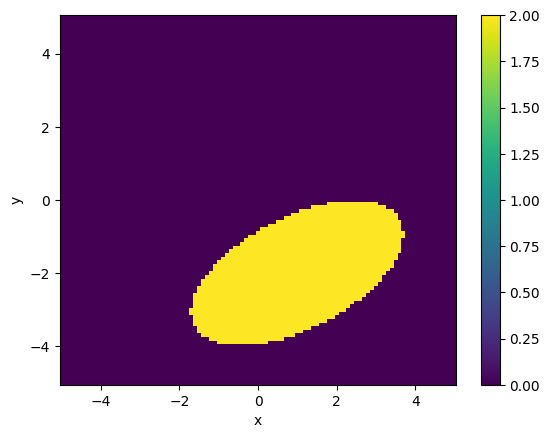

In [4]:
disk = make_disk(base, a=3.0, b=1.5, theta=np.deg2rad(30), x0=1.0, y0=-2.0, height=2.0)
plot_correct_orientation(disk, "x", "y")

**theta** can be specified in degrees if the optional parameter, **degrees**, is set to True

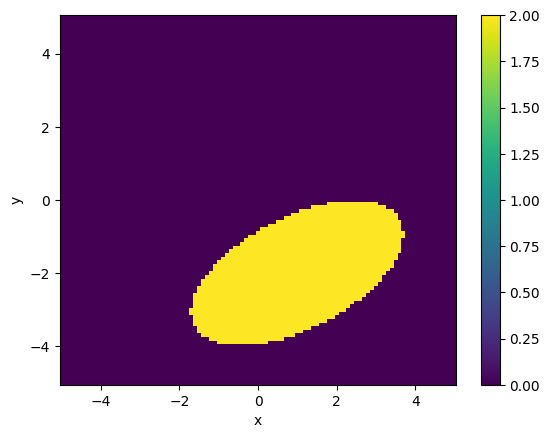

In [5]:
disk = make_disk(base, a=3.0, b=1.5, theta=30, x0=1.0, y0=-2.0, height=2.0, degrees=True)
plot_correct_orientation(disk, "x", "y")

By default, in left handed coordinate systems, **theta** is interpreted as the position
angle, measured from +y -> +x.

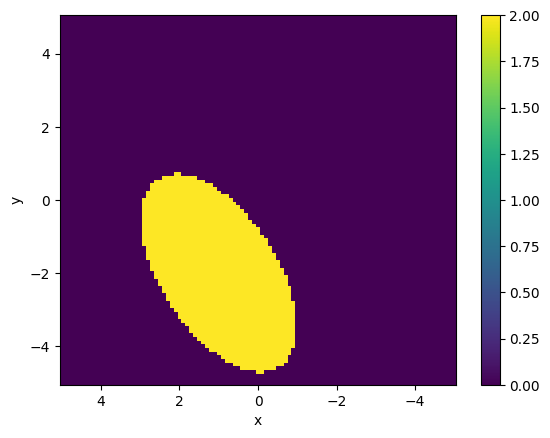

In [6]:
# reverse the x coord so that it increases to the left, common in equatorial systems
base_flipped = base.sortby("x", ascending=False) 
disk_flipped = make_disk(
    base_flipped, a=3.0, b=1.5, theta=30,
    x0=1.0, y0=-2.0, height=2.0, degrees=True
)
plot_correct_orientation(disk_flipped, "x", "y")

However, the default behavior can be overridden by specifying **angle**="math", in
which case **theta** is interpreted in the normal mathematical convention of
being measured from +x -> +y.

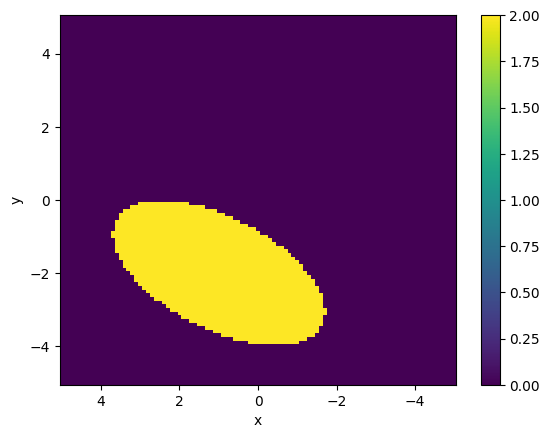

In [7]:
disk_flipped_math = make_disk(
    base_flipped, a=3.0, b=1.5, theta=30,
    x0=1.0, y0=-2.0, height=2.0, degrees=True, angle="math"
)
plot_correct_orientation(disk_flipped_math, "x", "y")

## 2D Gaussian

This is the usual shape of restoring beams. The inputs and their meainings are identical
to **make_disk()** with the exceptions:

+ **a**: FWHM of major axis
+ **b**: FWHM of minor axis
+ **peak**: peak value of the gaussian (analogous to **height** for **make_disk()**)

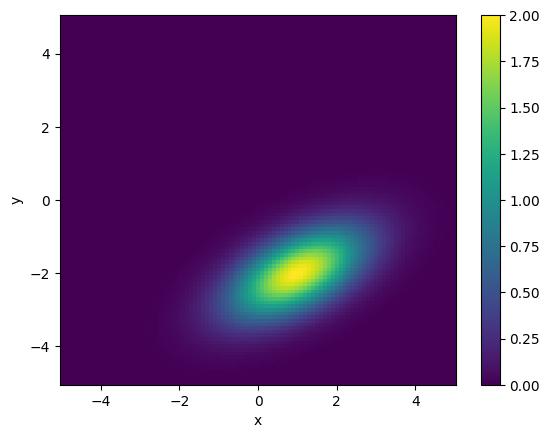

In [8]:
gauss2d = make_gauss2d(
    base, a=3.0, b=1.5, theta=np.deg2rad(30),
    x0=1.0, y0=-2.0, peak=2.0
)
plot_correct_orientation(gauss2d, "x", "y")

As with **make_disk**, by default, **theta** is the position angle in left-handed
coordiante systems.

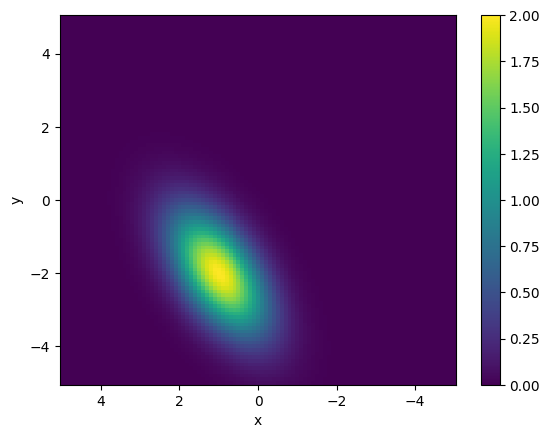

In [9]:
gauss2d_flipped = make_gauss2d(
    base_flipped, a=3.0, b=1.5, theta=30,
    x0=1.0, y0=-2.0, peak=2.0, degrees=True
)
plot_correct_orientation(gauss2d_flipped, "x", "y")

And also that behavior can be overridden by specifying the **angle** parameter.

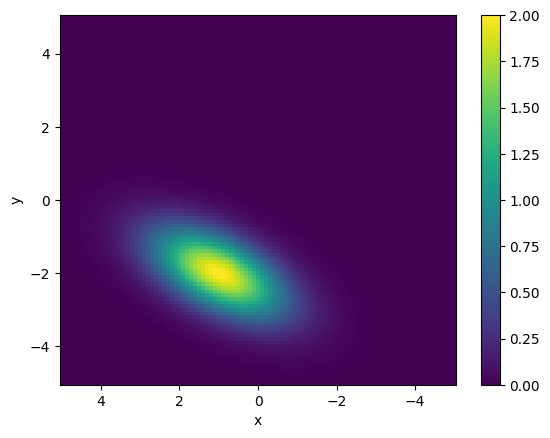

In [10]:
gauss2d_flipped_math = make_gauss2d(
    base_flipped, a=3.0, b=1.5, theta=30,
    x0=1.0, y0=-2.0, peak=2.0, degrees=True, angle="math"
)
plot_correct_orientation(gauss2d_flipped_math, "x", "y")

## Collection of Point Sources

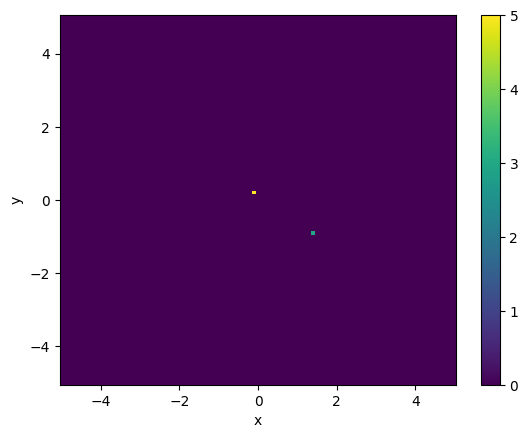

In [11]:
pt_srcs= make_pt_sources(base, amplitudes=[5, 3], xs=[-0.1, 1.4], ys=[0.2, -0.9])
pt_srcs.plot()

# TODO Demonstrate behavior options if specified points are outside the grid